<a href="https://colab.research.google.com/github/sharifbubuka/uni-bremen-edge-computing-course/blob/main/tiny_ml_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TINY ML ASSIGNMENT 1

## CONFIGURATIONS

In [68]:
# Define paths to model files
import os
MODELS_DIR = 'models/'

if not os.path.exists(MODELS_DIR):
  os.mkdir(MODELS_DIR)

MODELS_TF = [MODELS_DIR + 'model-1', MODELS_DIR + 'model-2', MODELS_DIR + 'model-3', MODELS_DIR + 'model-4', MODELS_DIR + 'model-5', MODELS_DIR + 'model-6']
MODELS_TFLITE = [MODELS_DIR + 'model-1.tflite', MODELS_DIR + 'model-2.tflite', MODELS_DIR + 'model-3.tflite', MODELS_DIR + 'model-4.tflite', MODELS_DIR + 'model-5.tflite', MODELS_DIR + 'model-6.tflite']

In [49]:
# Install dependencies
! pip install tensorflow

In [69]:
# Import dependencies
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

## DATA SETUP

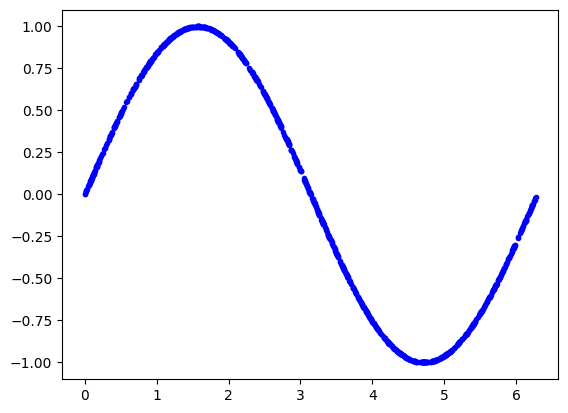

In [70]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values).astype(np.float32)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

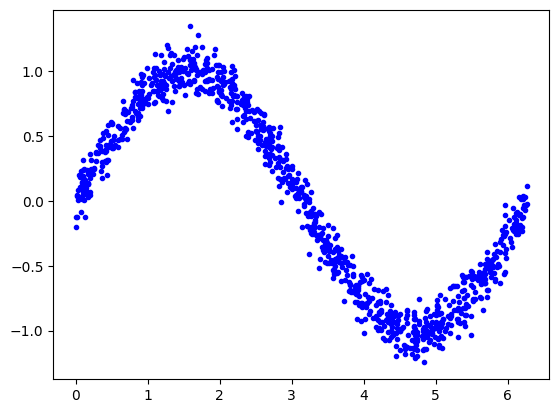

In [71]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

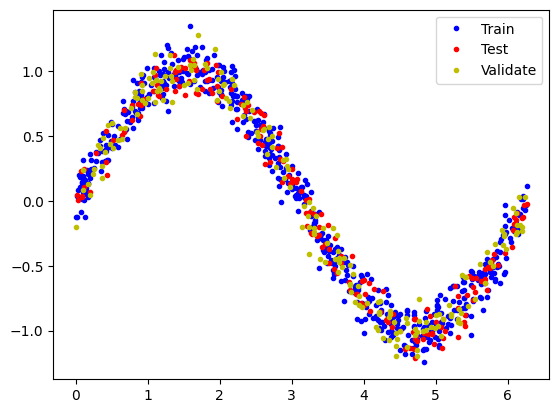

In [72]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()


## MODEL DESIGNS

In [73]:
# model design configurations

models = []

model_configurations = [[16, 1], [16, 2], [16, 4], [32, 1], [32, 2], [32, 4]]

# function to create model, given number of nodes and layers
def create_model(num_nodes, num_layers):
  model = tf.keras.Sequential()

   # First layer with specified number of nodes
  model.add(keras.layers.Dense(num_nodes, activation='relu', input_shape=(1,)))

  # Adding hidden layers based on the num_layers
  for _ in range(num_layers - 1):
        model.add(keras.layers.Dense(num_nodes, activation='relu'))

  # Final output layer
  model.add(keras.layers.Dense(1))

  # Compile the model
  model.compile(optimizer='adam', loss="mse", metrics=["mae"])

  return model


In [74]:
# Deisgn the models
for config in model_configurations:
    num_nodes, num_layers = config
    model = create_model(num_nodes, num_layers)
    models.append(model)

In [75]:
for i, model in enumerate(models):
    print(f"Model {i+1} summary:")
    model.summary()
    print("\n")

Model 1 summary:
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 16)                32        
                                                                 
 dense_61 (Dense)            (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model 2 summary:
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 16)                32        
                                                                 
 dense_63 (Dense)            (None, 16)                272       
                        

## MODEL TRAINING

In [76]:
# Model training configurations

# Training Paramters
epochs = 500
batch_size = 64
validation_data=(x_validate, y_validate)

In [77]:
# Model training

histories = [model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data) for model in models]

Streaming output truncated to the last 5000 lines.
10/10 [==============================] - 1s 26ms/step - loss: 0.6821 - mae: 0.7317 - val_loss: 0.5286 - val_mae: 0.6513
Epoch 2/500
10/10 [==============================] - 0s 8ms/step - loss: 0.4588 - mae: 0.5918 - val_loss: 0.4630 - val_mae: 0.5823
Epoch 3/500
10/10 [==============================] - 0s 8ms/step - loss: 0.4428 - mae: 0.5547 - val_loss: 0.4462 - val_mae: 0.5680
Epoch 4/500
10/10 [==============================] - 0s 8ms/step - loss: 0.4175 - mae: 0.5438 - val_loss: 0.4189 - val_mae: 0.5590
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 0.3934 - mae: 0.5377 - val_loss: 0.4006 - val_mae: 0.5478
Epoch 6/500
10/10 [==============================] - 0s 10ms/step - loss: 0.3747 - mae: 0.5223 - val_loss: 0.3811 - val_mae: 0.5331
Epoch 7/500
10/10 [==============================] - 0s 9ms/step - loss: 0.3571 - mae: 0.5072 - val_loss: 0.3633 - val_mae: 0.5214
Epoch 8/500
10/10 [=======================

In [78]:
# Save models
for index, model in enumerate(models):
  model.save(MODELS_DIR + f'model-{index + 1}')

## LITE MODEL QUANTIZATION

In [80]:
# Convert each model to the TensorFlow Lite format with quantization
def representative_dataset():
    for i in range(500):
        yield([x_train[i].reshape(1, 1)])

for index, model in enumerate(models):
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    # Set the optimization flag
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    # Enforce integer only quantization
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    # Provide a representative dataset to ensure we quantize correctly
    converter.representative_dataset = representative_dataset
    model_tflite = converter.convert()

    dir_path = f'models/model-{index + 1}'

    # Save the model to disk
    with open(os.path.join(dir_path, f'model-{index + 1}.tflite'), "wb") as f:
        f.write(model_tflite)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
/usr/local/lib/python3.10/dist

## METRIC ANALYSIS

In [91]:
test_maes = [model.evaluate(x_test, y_test)[1] for model in models]

train_maes = [history.history['mae'][-1] for history in histories]

print(train_maes)

7/7 [==============================] - 0s 7ms/step - loss: 0.0104 - mae: 0.0805
[0.30429065227508545, 0.09298162162303925, 0.08700448274612427, 0.2953930199146271, 0.08636718988418579, 0.08450620621442795]


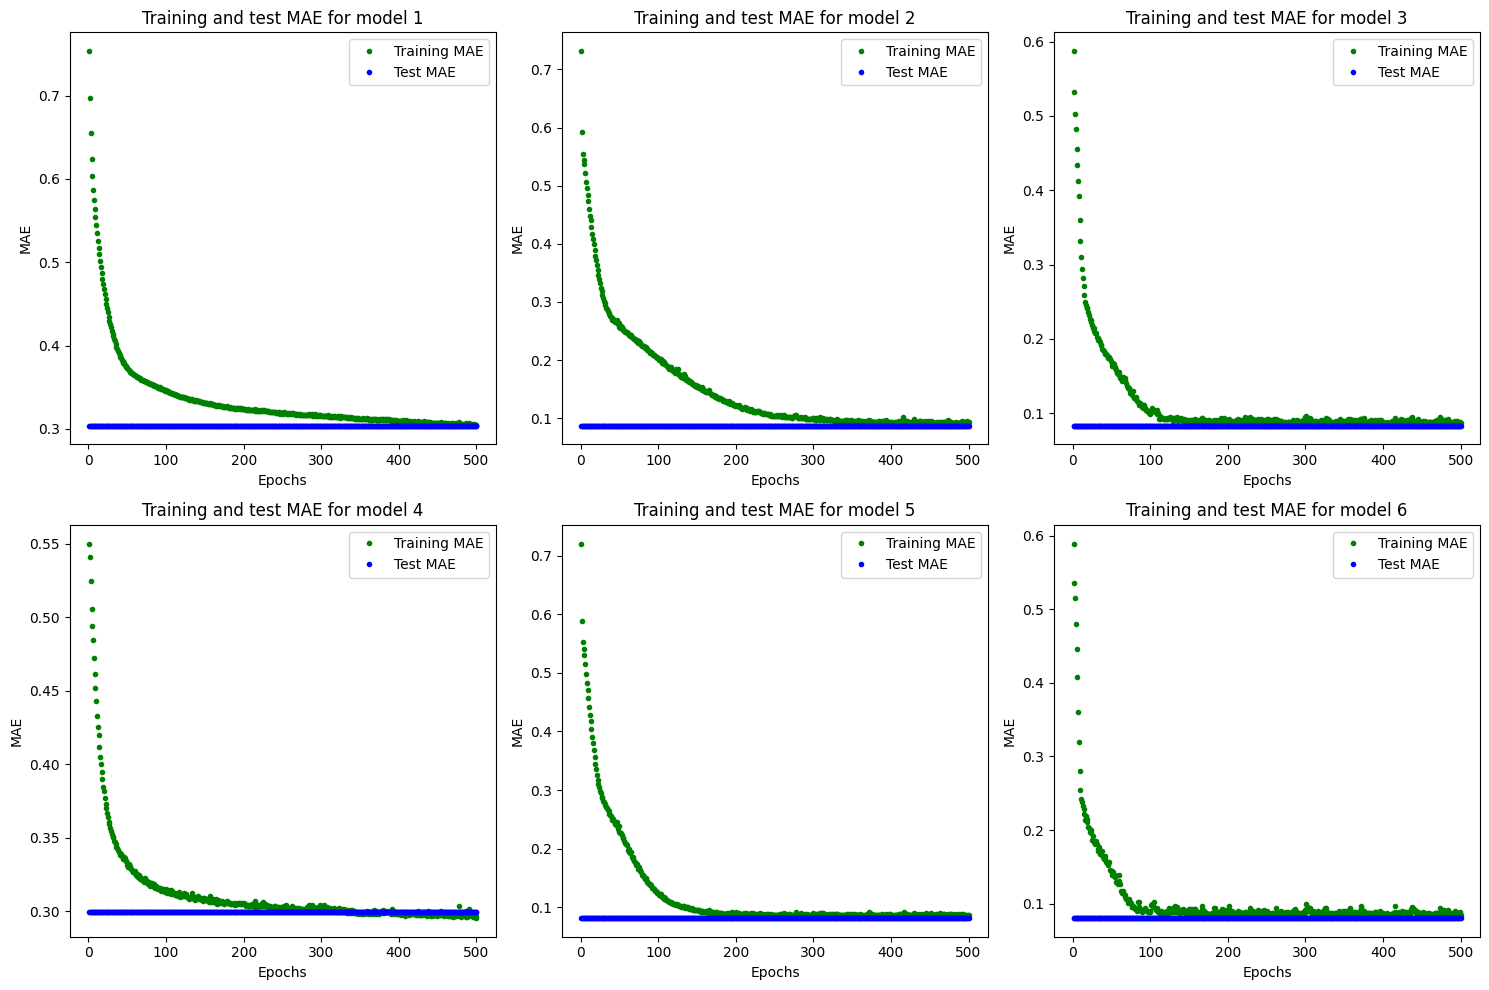

In [90]:
epochs = range(1, 501)
SKIP = 0

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs = axs.flatten()

for index, history in enumerate(histories):
    train_mae = history.history['mae']
    test_loss, test_mae = models[index].evaluate(x_test, y_test, verbose=0)

    ax = axs[index]
    ax.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
    ax.plot(epochs[SKIP:], [test_mae] * len(epochs[SKIP:]), 'b.', label='Test MAE')
    ax.set_title(f'Training and test MAE for model {index + 1}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('MAE')
    ax.legend()

# Adjust layout to make it neat
plt.tight_layout()
plt.show()

In [ ]:
# Test MAE
